In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [2]:
df = pd.read_csv('candy_production.csv') # считываем датасет
df.head() # смотрим на первые несколько строчек

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [3]:
df.columns = (['Month','Quant'])
df.head()

,Month,Quant
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [4]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.drop(['Month'], axis = 1, inplace = True)
df.head() # смотрим на результат

,Quant
Month,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


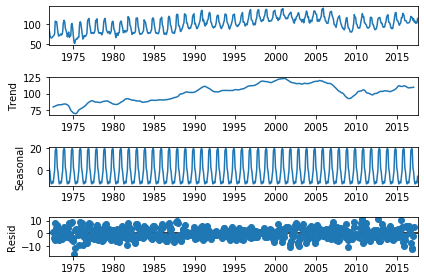

In [5]:
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [6]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [14]:
residual_part.head(20)

Month
1972-01-01         NaN
1972-02-01         NaN
1972-03-01         NaN
1972-04-01         NaN
1972-05-01         NaN
1972-06-01         NaN
1972-07-01    0.585060
1972-08-01   -4.098878
1972-09-01   -5.638989
1972-10-01    8.035513
1972-11-01    4.132112
1972-12-01    4.734343
1973-01-01    6.214930
1973-02-01   -4.256449
1973-03-01   -5.586674
1973-04-01   -0.628495
1973-05-01    0.498318
1973-06-01    1.692351
1973-07-01    0.259327
1973-08-01   -4.785453
Name: resid, dtype: float64

In [15]:
residual_part.tail(20)

Month
2016-01-01    -5.657649
2016-02-01    -1.788279
2016-03-01     5.420801
2016-04-01     6.026226
2016-05-01     4.858789
2016-06-01     3.793001
2016-07-01     5.701956
2016-08-01     1.168642
2016-09-01     0.308232
2016-10-01    -7.826012
2016-11-01   -12.238976
2016-12-01   -11.886948
2017-01-01    -2.359511
2017-02-01     5.045926
2017-03-01          NaN
2017-04-01          NaN
2017-05-01          NaN
2017-06-01          NaN
2017-07-01          NaN
2017-08-01          NaN
Name: resid, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1972-01-01 to 2017-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Quant   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [13]:
residual_part.isnull().sum()

12

In [16]:
len(residual_part)

548

In [17]:
len(seasonal_part)

548

In [18]:
seasonal_part.isnull().sum()

0